#**Atividade Prática**
Uma empresa precisa fazer uma pesquisa sobre a satisfação pública de um de seus programas de televisão exibido no **Acre**. Para isso, precisa selecionar amostras de pessoas de diferentes cidades.
A amostra selecionada deve ser **a menor possível**, pois quanto mais gente participante da pesquisa, mais custo a empresa tem para realizar o estudo.

Nessa amostra devemos garantir alguns requisitos mínimos, que são:

*   A amostra deve ter um número mínimo de jovens
*   A amostra deve ter um número mínimo de ativos
*   O tamanho de amostra de cada cidade deve respeitar o total de população de cada cidade
*   Cada cidade deve ter uma porcentagem máxima de representatividade na amostra final

**Resolva esse problema usando técnicas de otimização contínua.**

*Obs.: Use o dataset de cidades para consultar os dados. Os dados usados serão: 'População residente'; 'Porcentagem de Jovens'; 'Porcentagem de Ativos'*

## **O que queremos com essa atividade prática?**
O objetivo dessa atividade prática é consolidar a ideia de formulação matemática de problemas e aprender a resolver o problema na prática usando solvers comerciais, Para esse segundo objetivo vamos usar a biblioteca PuLP, mas informações [aqui](https://coin-or.github.io/pulp/).

## **Passo 1**
Antes da implementação do problema usando a biblioteca PuLP temos que definir a formulação matemática desse problema e para isso temos que definir: variáveis, parâmetros, conjuntos, restrições e objetivos do problema.

**Variáveis:**

*   x_c - quantidade de pessoas selecionada de cada cidade
*   y_c - proporção de amostra de cada cidade
*   z - total de amostra selecionada

**Parâmetros:** (dados do problema)
*   J_c - porcentagem de jovens de cada cidade
*   A_c - porcentagem de ativos de cada cidade
*   P_c - população total das cidades
*   MJ - número mínimo de jovens
*   MA - Número mínimo de ativos
*   PP - proporção máxima permitida da amostra de cada cidade em relação ao total de pessoas

**Conjuntos:** (em relação ao que nossos parâmetros e variáveis se diferenciam)
*   c - Cidades

**Restrições:** (são os requisitos mínimos listados na descrição do problema)
*   A amostra deve ter um número mínimo de jovens

> 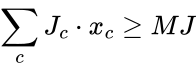


*   A amostra deve ter um número mínimo de ativos

> 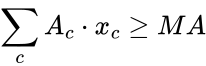

*    O tamanho de amostra de cada cidade deve respeitar o total de população de cada cidade

Para toda cidade c ->>
>image.png

*  Cada cidade deve ter uma porcentagem máxima de representatividade na amostra final
  1.   Para essa última restrição antes de definir a equação que limita a proporção de amostra em cada cidade, temos que calcular o tamanho total da amostra que está sendo selecionada (representada pela variável z):
  > 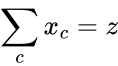

  2.   E por fim definir a equação que limita a próporção de amostra em cada cidade:

  Para toda cidade c ->>
  > image.png


**Objetivo:**

O objetivo também está apresentado na definição do problema. Queremos selecionar uma amostra representativa, mas ao menor custo possível e aqui o menor custo representa selecionar o *mínimo de pessoas*.

> 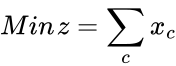

## **Passo 2**
Resolver o problema usando a biblioteca PuLP. Para isso vamos seguir as seguintes etapas:


1.   Importar o dataset de Cidades e tratá-lo para extrair os parâmetros (dados) a serem utilizados no problema
2.   Importar a Bibliotes PuLP
3.   Traduzir a formulação matemática do problema definida no passo 1 para o formato reconhecido pela biblioteca PuLP

###***Importando e tratando os dados***

In [ ]:
#importando a biblioteca pandas
import pandas as pd

#Importando o dataset de cidades
dataset = pd.read_excel('dataset_cidades.xlsx')
dataset.head()

In [ ]:
#Filtrando os dados apenas no Acre (conforme definido na descrição do problema)
dataset_acre = dataset[(dataset['estado']=='Acre')]
dataset_acre

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538.0,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.00
1,Assis Brasil,Acre,6072.0,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.00
2,Brasiléia,Acre,21398.0,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.00
3,Bujari,Acre,8471.0,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.00
4,Capixaba,Acre,8798.0,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.00
5,Cruzeiro do Sul,Acre,78507.0,8.94,56.93,38.72,4.36,73.17,4.53,58.96,...,79.96,1.51,14.12,53.95,923.87,2771491.02,15.31,7.75,22.56,0.25
6,Epitaciolândia,Acre,15100.0,9.13,51.81,43.38,4.81,72.06,4.72,64.29,...,85.11,0.54,4.64,47.28,810.69,2376713.00,15.22,7.12,27.88,0.00
7,Feijó,Acre,32412.0,1.16,61.75,34.54,3.72,56.12,3.48,68.98,...,79.12,2.03,10.20,16.90,928.59,1928751.32,8.15,5.71,5.71,0.00
8,Jordão,Acre,6577.0,1.23,69.83,28.40,1.76,37.83,0.47,77.28,...,100.00,0.00,0.00,2.38,739.28,2471942.45,13.53,7.48,1.52,0.00
9,Mâncio Lima,Acre,15206.0,2.79,58.84,37.17,3.99,60.42,0.29,68.75,...,68.18,0.73,6.78,10.44,818.94,1969925.74,11.46,5.20,2.04,0.00


**Precisamos extrair dos dados os parâmetros e cojuntos do problema. Para usar na biblioteca PuLP, os parâmetros devem estar em formato de dicionário e os conjuntos em formato de listas.**

In [ ]:
#Definindo o conjunto de cidades
dataset_acre = dataset_acre.sort_values(by=['nomeLocalidade'])
Cidades = dataset_acre['nomeLocalidade'].drop_duplicates().to_list()
Cidades

In [ ]:
#Definindo o parâmetro J_c - porcentagem de jovens das cidades
dataset_J = dataset_acre[['nomeLocalidade','Porcentagem de Jovens']]
dataset_J['Porcentagem de Jovens'] = dataset_J['Porcentagem de Jovens']/100
list_c=[(dataset_J.loc[i, 'nomeLocalidade']) for i in range(0,len(dataset_J['nomeLocalidade']))]
list_J=[(dataset_J.loc[i, 'Porcentagem de Jovens']) for i in range(0,len(dataset_J['nomeLocalidade']))]
zip_iterator = zip(list_c, list_J)
J = dict(zip_iterator)
J

In [ ]:
#Definindo o parâmetro A_c - porcentagem de ativos das cidades
dataset_A = dataset_acre[['nomeLocalidade','Porcentagem de Ativos']]
dataset_A['Porcentagem de Ativos'] = dataset_A['Porcentagem de Ativos']/100
list_c=[(dataset_A.loc[i, 'nomeLocalidade']) for i in range(0,len(dataset_A['nomeLocalidade']))]
list_A=[(dataset_A.loc[i, 'Porcentagem de Ativos']) for i in range(0,len(dataset_A['nomeLocalidade']))]
zip_iterator = zip(list_c, list_A)
A = dict(zip_iterator)
A

In [ ]:
#Definindo o parâmetro P_c - porcentagem de jovens das cidades
dataset_P = dataset_acre[['nomeLocalidade','População residente']]
list_c=[(dataset_P.loc[i, 'nomeLocalidade']) for i in range(0,len(dataset_P['nomeLocalidade']))]
list_P=[(dataset_P.loc[i, 'População residente']) for i in range(0,len(dataset_P['nomeLocalidade']))]
zip_iterator = zip(list_c, list_P)
P = dict(zip_iterator)
P

In [ ]:
#Definindo os parâmetros que não varia por cidade (são dados na descrição do problema)
MJ = 20000
MA = 40000
PP = 0.05